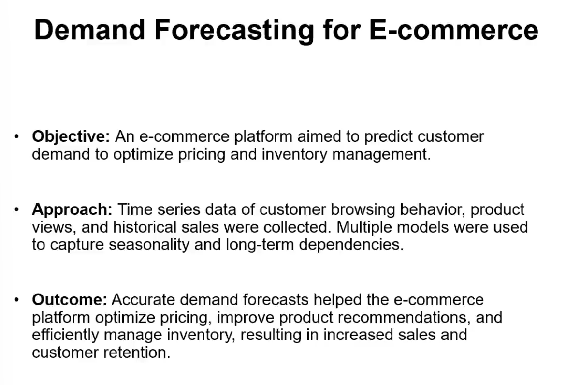

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('demand.csv')

data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Display the missing values
missing_values

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [5]:
# Fill the missing value in 'total_price' with the median of 'total_price' for the corresponding 'sku_id'

# First, calculate the median total_price for each sku_id
median_price_per_sku = data.groupby('sku_id')['total_price'].median()

# Then, fill the missing value
data['total_price'].fillna(data['sku_id'].map(median_price_per_sku), inplace = True)

# Check if there are any remaining missing values
data.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_26940\3906240434.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_price'].fillna(data['sku_id'].map(median_price_per_sku), inplace = True)


record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [7]:
# Convert the week column to datetime format
data['week'] = pd.to_datetime(data['week'], format='%d/%m/%y')

# Aggregate the data by week
weekly_data= data.groupby('week')['units_sold'].sum().reset_index()

# Display the first few rows of aggregated data
weekly_data.head(10)

,week,units_sold
0,2011-01-17,60029
1,2011-01-24,56752
2,2011-01-31,51467
3,2011-02-07,54656
4,2011-02-14,109207
5,2011-02-21,82986
6,2011-02-28,84153
7,2011-03-07,56231
8,2011-03-14,53376
9,2011-03-21,61539


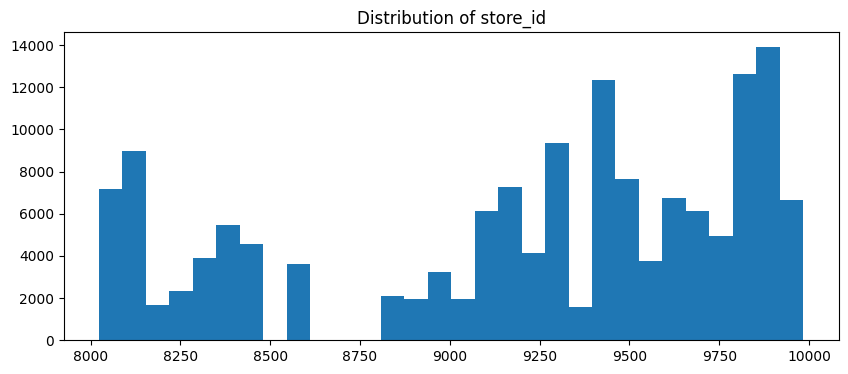

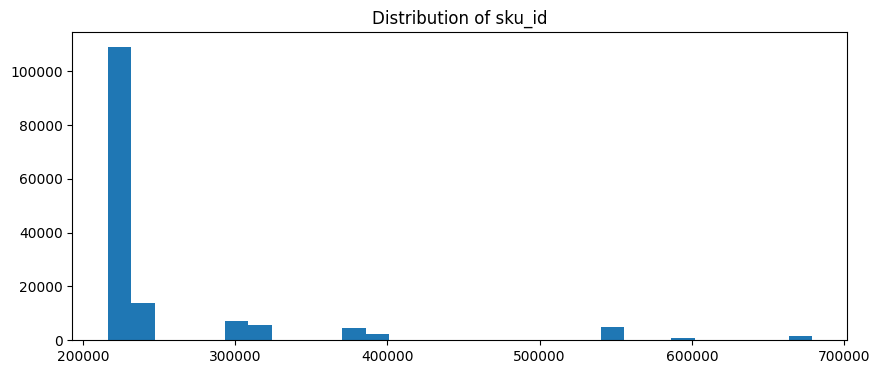

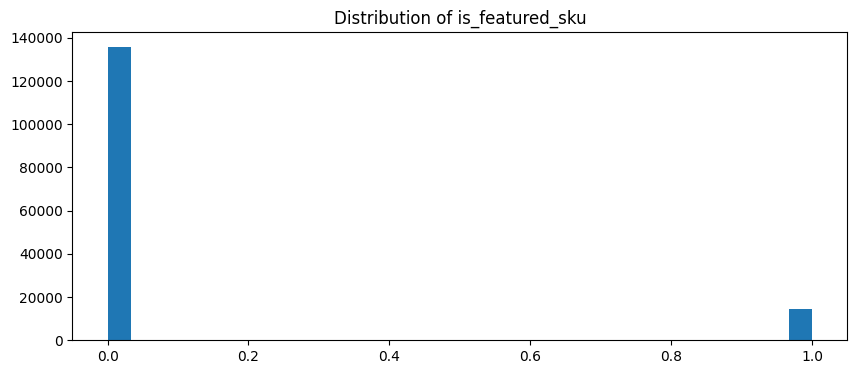

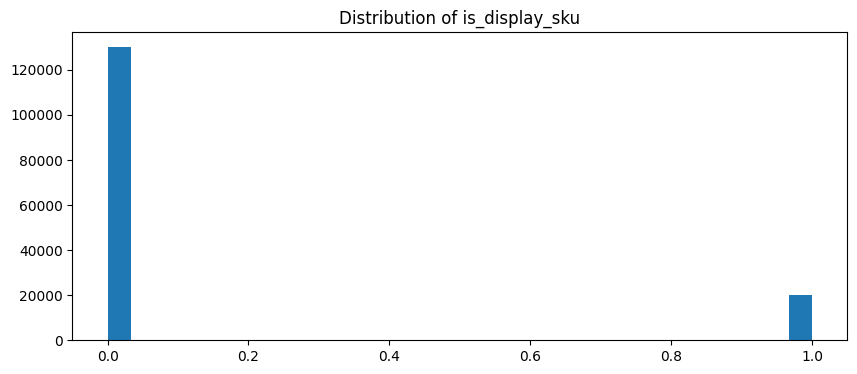

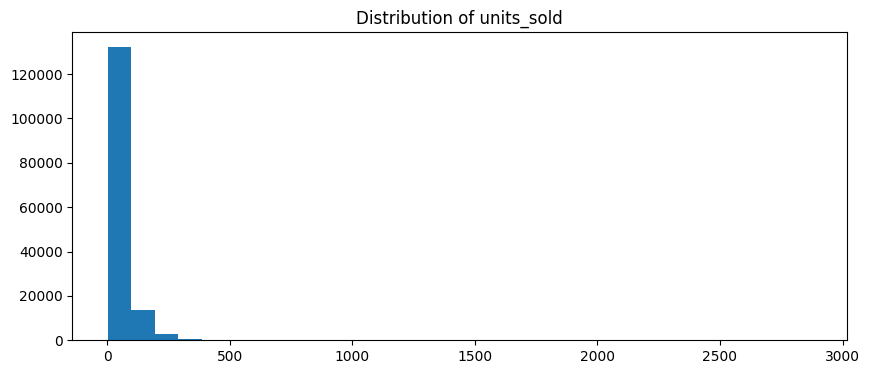

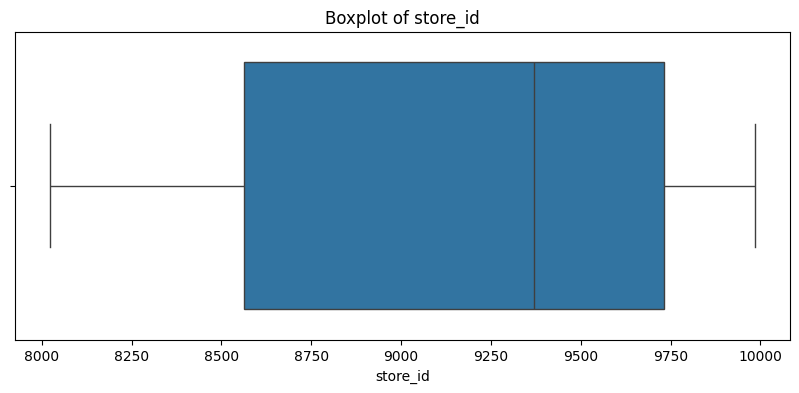

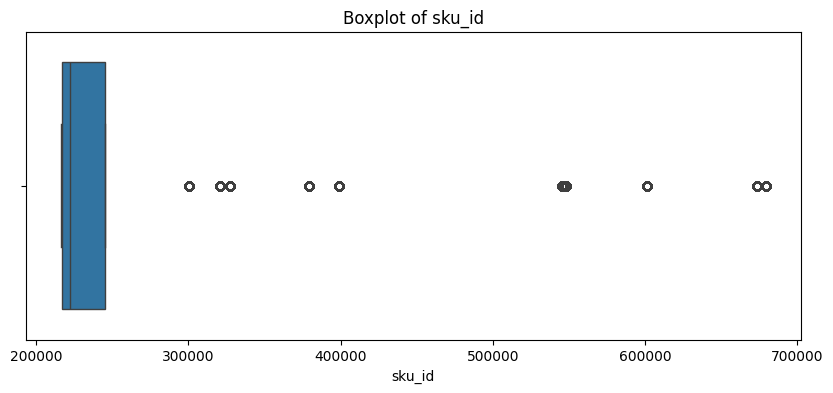

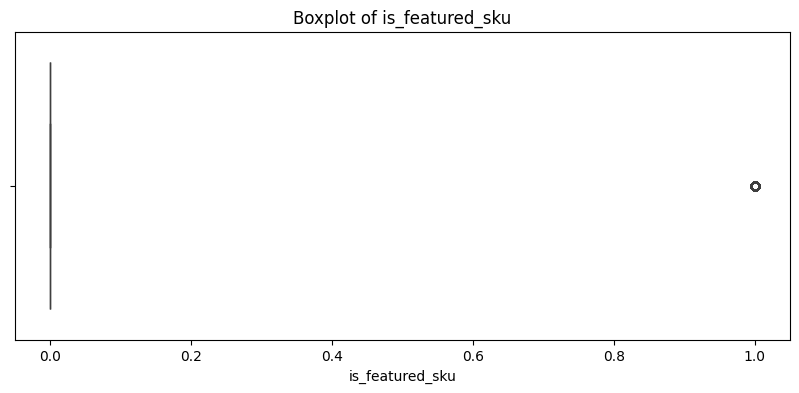

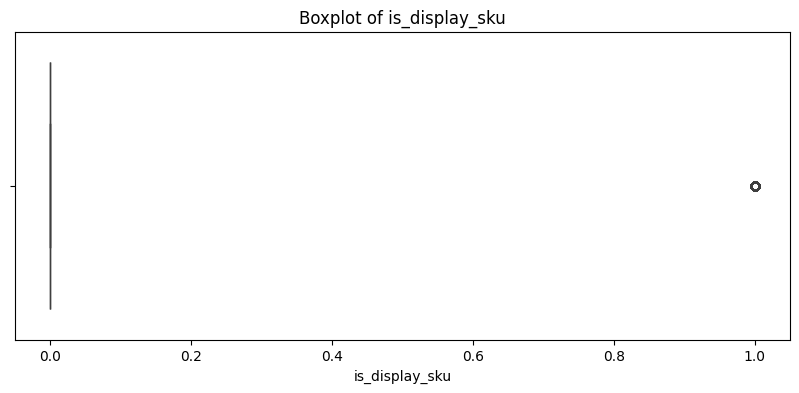

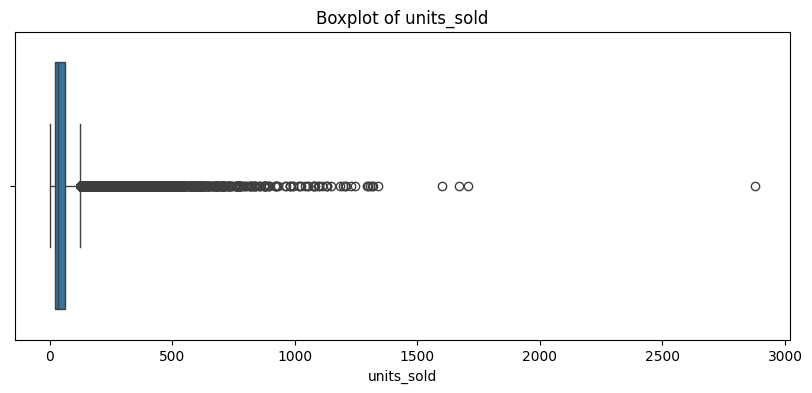

Text(0.5, 1.0, 'Correlation matrix heatmap')

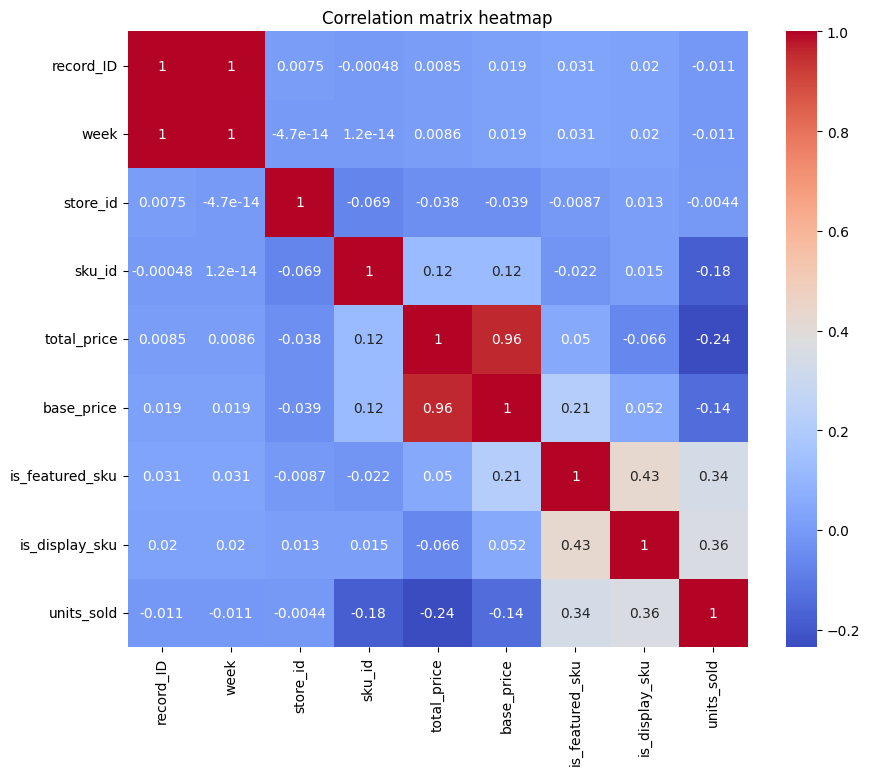

In [9]:
import seaborn as sns

# Plot histograms for categorical columns and the target variable

categorical_cols= ['store_id','sku_id','is_featured_sku','is_display_sku','units_sold']

for col in categorical_cols:
    plt.figure(figsize =(10,4))
    plt.hist(data[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box Plot for numerical columns
numerical_cols = ['total_price',' base_price']

for col in categorical_cols:
    plt.figure(figsize =(10,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Check the correlation between features
correlation = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation matrix heatmap')

Here are some observations based on the distribution of data and the correlation matrix:

store_id: The distribution shows that the dataset contains data from multiple stores. However, we don't have enough details to make more specific observations about the stores.

sku_id: The distribution suggests that the dataset contains data on multiple SKUs. Similarly, we can't make more specific observations without additional details.

is_featured_sku and is_display_sku: These are binary variables indicating whether the SKU was featured or displayed. The majority of SKUs were neither featured nor displayed.

units_sold: This variable, representing the number of units sold, shows a right-skewed distribution. Most of the values are low, but there are some weeks where a large number of units were sold.

total_price and base_price: These variables represent the total price and base price of the SKUs. There are some outliers, particularly for total price, which may be due to special sales or particularly expensive SKUs.

Looking at the correlation matrix, we see that is_featured_sku and is_display_sku have a moderate positive correlation with units_sold, indicating that when SKUs are featured or displayed, more units tend to be sold. There is also a slight negative correlation between total_price and units_sold, suggesting that lower priced items may sell in higher quantities.

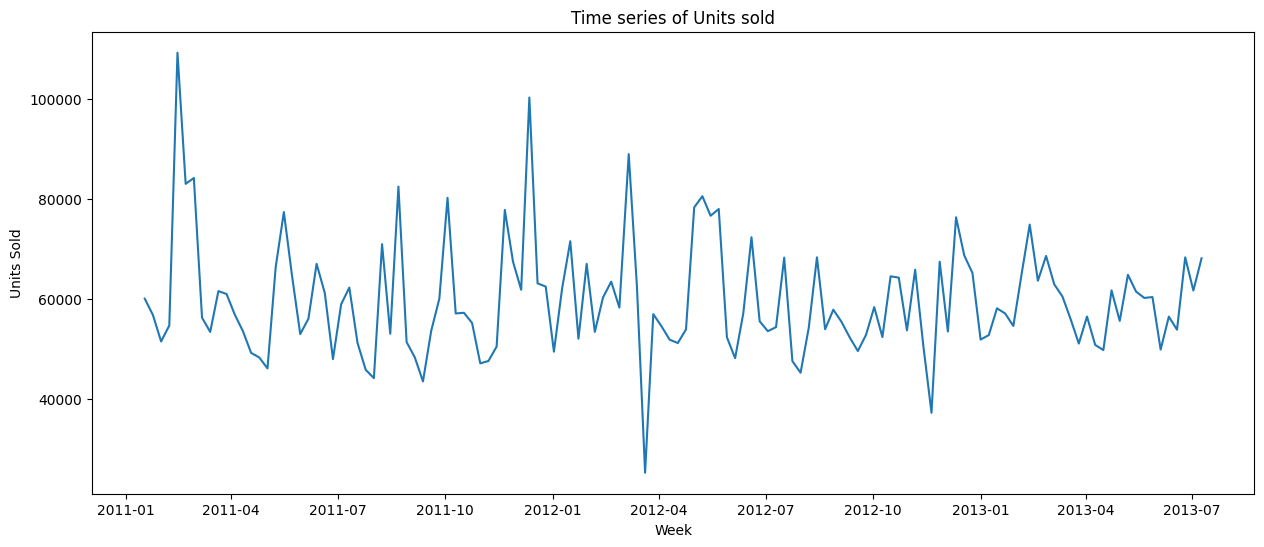

In [10]:
# Plot the time series of 'units_sold'

plt.figure(figsize =(15,6))
plt.plot(weekly_data['week'],weekly_data['units_sold'])
plt.title('Time series of Units sold')
plt.xlabel('Week')
plt.ylabel('Units Sold')
plt.show()

The time series plot of units_sold shows a fairly irregular pattern with some apparent seasonality. We can see periodic spikes, which could be related to specific events or seasons throughout the year. However, there is no clear increasing or decreasing trend over the entire time period.

Next, let's decompose the time series to more formally check for seasonality and trend. This involves breaking down the time series into three components:

Trend: The underlying pattern in the data.
Seasonality: Cyclical patterns in the data.
Residual: The remainder of the time series after the trend and seasonal components have been removed.
We'll use the seasonal_decompose function from the statsmodels library to do this. Let's proceed with that.

In [11]:
weekly_data

,week,units_sold
0,2011-01-17,60029
1,2011-01-24,56752
2,2011-01-31,51467
3,2011-02-07,54656
4,2011-02-14,109207
...,...,...
125,2013-06-11,56433
126,2013-06-18,53818
127,2013-06-25,68283
128,2013-07-02,61655


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'week' as the index for the data

weekly_data.set_index('week',inplace=True)

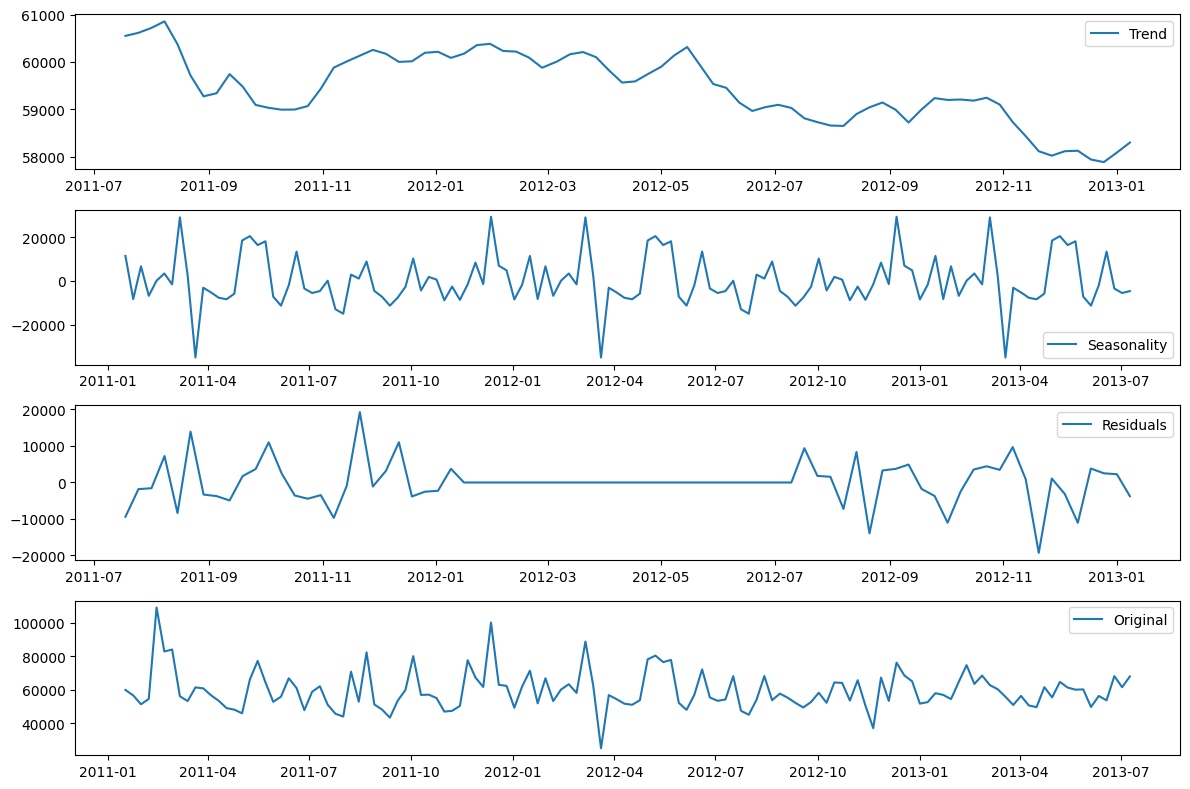

In [17]:
# Decompose the timeseries with a period of 52 weeks

decomposition = seasonal_decompose(weekly_data['units_sold'],period=52)

# Plot the trend, seasonality and residuals
plt.figure(figsize=(12,8))

# Trend
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

# Seasonality
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')

# Residuals
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

# Original
plt.subplot(414)
plt.plot(weekly_data['units_sold'], label='Original')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

The time series decomposition reveals the following insights:

Trend: The trend component shows a relatively stable pattern over time, indicating that there is no significant long-term increase or decrease in the total number of units sold.

Seasonality: The seasonality component shows a clear pattern that repeats annually. This suggests that there are specific times during the year when sales tend to be higher or lower.

Residuals: The residuals component represents the remainder of the time series after the trend and seasonal components have been removed. It shows irregular fluctuations, which could be due to random variations or other factors not captured by the trend and seasonality.

Next, we'll check for volatility in the time series. Volatility refers to the variation of price of a financial instrument over time. Here, we can consider it as the variation in the number of units sold over time. We can measure this by looking at the standard deviation of the percentage change in units_sold from one week to the next. Let's calculate this next.

After that, we'll calculate the moving average for the time series. The moving average is a commonly used technique in time series analysis to smooth out short-term fluctuations and highlight longer-term trends or cycles. We'll calculate the 4-week and 52-week (approximately one month and one year) moving averages.